# Plotting Band Structures

INFO     | The band structure has been calculated with spin-orbit-coupling.
INFO     | The fundamental band gap is indirect.
INFO     | The size of the band gap is 0.6356 eV from the outputfile and 0.6213 eV from the spectrum.
INFO     | The valence band maximum is located at k = ( 0.0000 0.0000 0.0000 ) in units of the reciprocal lattice.
INFO     | The conduction band minimum is located at k = ( 0.4167 -0.0000 0.4167 ) in units of the reciprocal lattice.
INFO     | The smallest direct band gap is 2.5184 eV large and is located at k = ( 0.0000 0.0000 0.0000 ) in units of the reciprocal lattice.


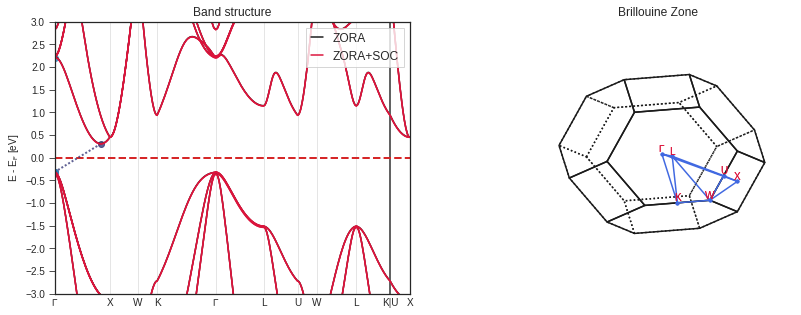

In [20]:
%matplotlib inline
# these two lines are only necessary to make the jupyter notebooks run on binder
import sys
sys.path.insert(0, "../..")

# We load the BandStructure class from aimstools
from aimstools import BandStructure

# We initialize this class from results in the directory "bandstructure"
bs = BandStructure("bandstructure")

# The BandStructure class is only a wrapper that gives you easy access to the underlying classes.
# You can access an information overview with:
bs.get_properties()
# The plot() method is a quick way to visualize everything, but cannot be customized as much.
bs.plot()

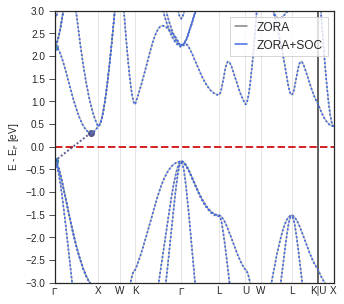

In [21]:
# If you want to customize the plot, you need to access the subclasses where the information is actually stored:
bs_zora = bs.bandstructure_zora
bs_soc = bs.bandstructure_soc

# ZORA and SOC band structures are typically overlaid. This can easily be done this way:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, axes = plt.subplots(1,1, figsize=(5,5))
# The main attribute specifies which plot is the most important one, such that gridlines and 
# the Fermi level are only drawn once. In many cases, this option is not needed.
axes = bs_zora.plot(axes=axes, color="gray", alpha=0.5, main=False)
axes = bs_soc.plot(axes=axes, color="royalblue", main=True, linestyle=":")
handles = []
handles.append(Line2D([0], [0], color="gray", label="ZORA", lw=1.5))
handles.append(Line2D([0], [0], color="royalblue", label="ZORA+SOC", lw=1.5))
lgd = axes.legend(
    handles=handles,
    frameon=True,
    fancybox=False,
    borderpad=0.4,
    loc="upper right",
)
plt.show()

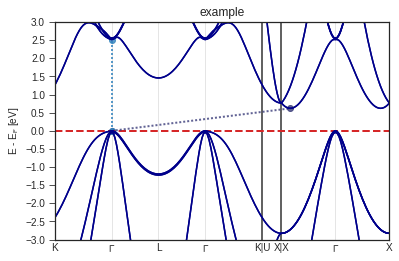

In [22]:
# The band structure objects have a lot of possible arguments. To summarize:

arguments= {
        "figsize":(5,5),  # specifies a figsize, if not specified by another axes object
        "filename":None,  # saves figure to file with filename
        "title":None,     # adds title to the plot
        "bandpath":None,  # changes bandpath, e.g. "GXWKWXG"
        "spin":None,      # shows one spin channel (if available), e.g. "up" or "dn"
        "reference":None, # changes the reference energy, e.g., "VBM", "middle", "fermi level". The default is chosen depending on the band gap of the system.
        "window":None,    # energy window to show in eV, can be a single number, e.g., 5, or a pair, like (-5,5)
        "mark_fermi_level":"crimson", # marks the fermi level with the color "crimson", can also be None
        "mark_gap":True,  # marks the direct and indirect gap, if existing, in the band structure
}

# For example:
axes = bs_soc.plot(figsize = (6,4),
            color="darkblue",
            linewidth=1.5,
            title="example", 
            bandpath="KGLGK,UX,XGX",
            reference="VBM")
plt.show()

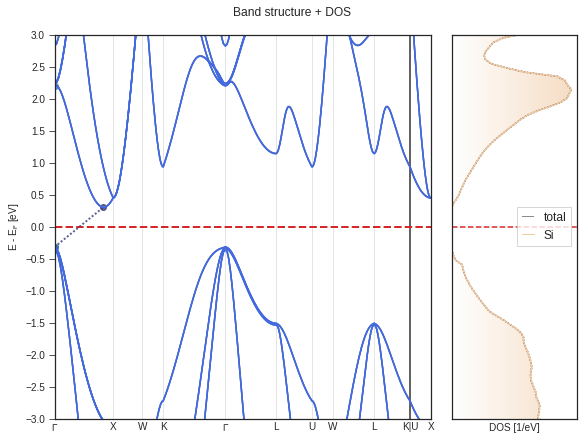

In [26]:
%matplotlib inline

# The most common task is to show bandstructures and densities of states side by side.
# With these tools, that is very easy:

from aimstools.bandstructures import RegularBandStructure
from aimstools.density_of_states import SpeciesProjectedDOS

bs1 = RegularBandStructure("bandstructure", soc=False)
bs2 = RegularBandStructure("bandstructure", soc=True)
dos = SpeciesProjectedDOS("bandstructure", soc=True)

import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(constrained_layout=True, figsize=(8, 6))
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[3, 1])

ax1 = fig.add_subplot(spec[0])
ax1 = bs1.plot(axes=ax1, color="gray", main=False)
ax1 = bs2.plot(axes=ax1, color="royalblue", main=True)

# The options to plot DOS are discussed in another tutorial. Here, we just plot all species.
ax2 = fig.add_subplot(spec[1])
ax2 = dos.plot_all_species(axes=ax2)

ax2.set_yticks([])
ax2.set_ylabel("")
fig.suptitle("Band structure + DOS")
plt.show()